# Project 1.2: Linear models and real-world data

```
From ML Theory to Practice
Universität Potsdam, fall semester 2025

Authors: Juan L. Gamella and Simon Bing
License: CC-BY-4.0 https://creativecommons.org/licenses/by/4.0/
```

## Imports

These packages should already be installed in your Python virtual environment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

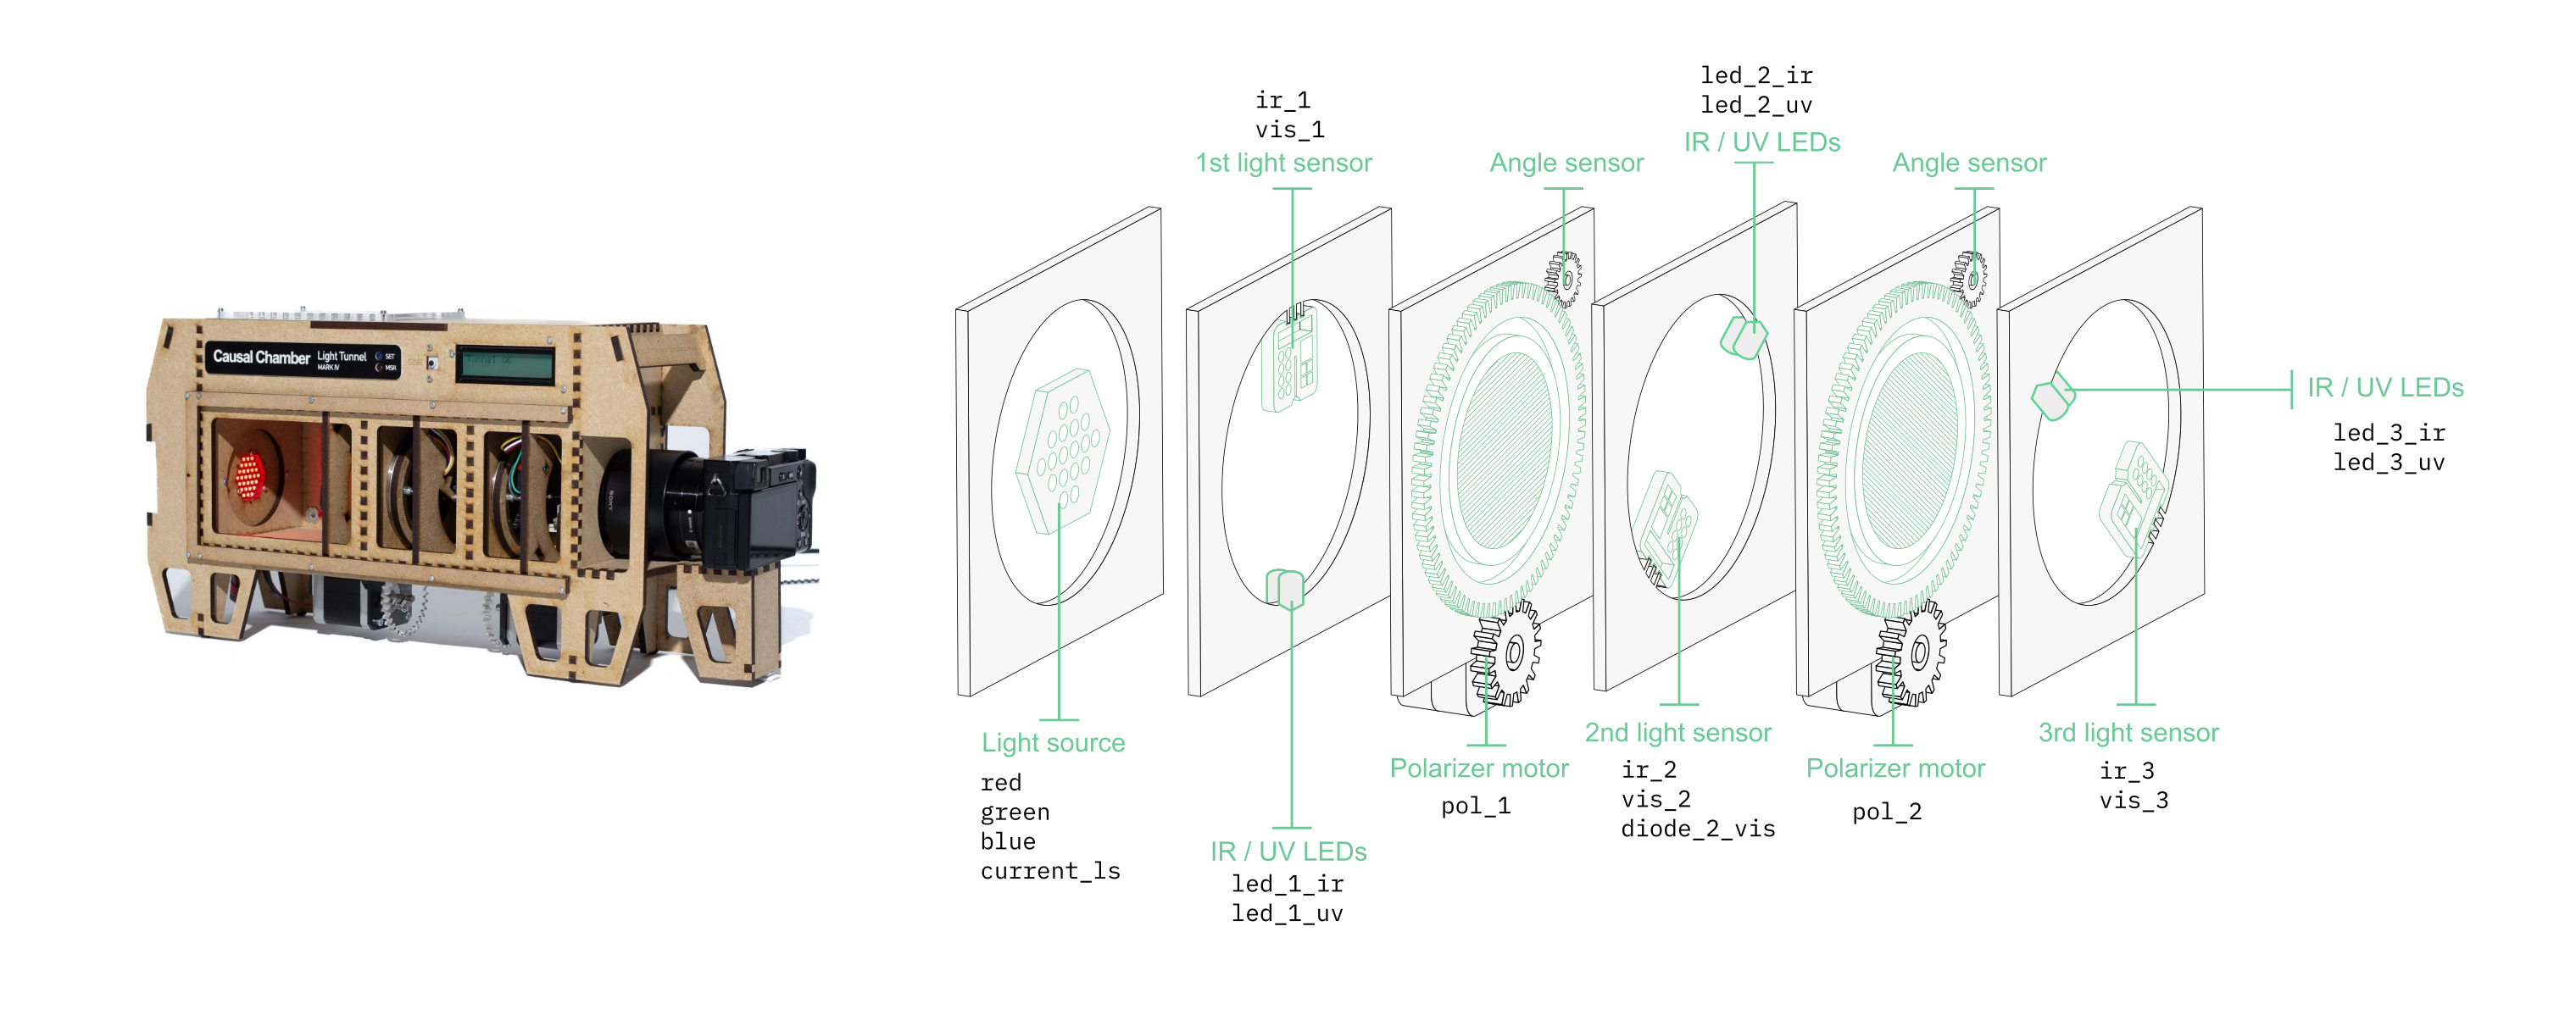

We will fit a linear model to solve a simple prediction problem: predicting the reading of the second infrared sensor (`ir_2`) from different sets of covariates, including the measurements of the other light sensors (`ir_1, vis_1, vis_2, ir_3, vis_3`), light source colors (`red`, `green`, `blue`) and the light source current (`current_ls`).

## Collect a dataset

In [ ]:
import causalchamber.lab as lab
rlab = lab.Lab(credentials_file = '.credentials')

<mark style="background-color: #40E0D0;"> Task </mark> 

Create and submit the following experiment:

1. Set `red`, `green`, `blue` to values sampled and uniformly at random from the range `[0,128]`
2. Take one measurement
3. Repeat 1 and 2 for a total of `N=100` observations.

In [ ]:
# TODO: your code goes here

You can use the following function to monitor the completion of your experiment and download the data:

In [ ]:
import time
def wait_and_download(experiment_id):
    data = None
    print(f"Waiting until experiment {experiment_id} is done")
    while data is None:        
        try:
            data = rlab.download_data(experiment_id = experiment_id, root='/tmp')          
        except lab.exceptions.UserError:
            print(".", end='')
            time.sleep(0.5)
    # Clear the line and return the data
    print()
    return data.dataframe

In [ ]:
all_data = wait_and_download(experiment_id)

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, visualize the data and answer the questions below.

You can use
 - `sns.pairplot` (make sure to specify `vars` or you will plot the 100 chamber variables).
 - the function `plot_sensor` below to plot the readings of each sensor vs. the light source color.

In [ ]:
def plot_sensor(sensor, df):
    color = df[['red', 'green', 'blue']].values
    plt.scatter(color.sum(axis=1) / 3, df[sensor], c=color/255, edgecolor='black', linewidth=0.5)
    plt.ylabel(f"sensor = {sensor}")
    plt.xlabel("(red + green + blue) / 3")

In [ ]:
all_variables = ['ir_1', 'ir_2', 'vis_2', 'ir_3', 'current_ls', 'red', 'green', 'blue']
# TODO: your code goes here

Now, answer some questions in the context of predicting `ir_2` from the other variables.

<mark style="background-color: #648fff;">Question:</mark> Would you say the relationships between `ir_2` and the other variables is linear?

<mark style="background-color: #648fff;">Question:</mark> Does the assumption of homoscedastic noise hold?

## Split into train & test data

<mark style="background-color: #40E0D0;"> Task </mark> 

To evaluate our models, split the data into disjoint training and test datasets, at a ratio of 80/20.

In [ ]:
# TODO: your code here
train_data = None
test_data = None

## Writing evaluation functions

We will evaluate the fitted models using the mean squared-error (MSE) of the obtained predictions. Given a fitted model $\hat{f}$ and a test set $\{(X_1, Y_1), \ldots (X_n, Y_n)\}$, the MSE is given by

$$MSE(\hat{f}) := \frac{1}{n}\sum_{i=1}^n \left(Y_i - \hat{f}(X_i)\right)^2.$$

<mark style="background-color: #40E0D0;"> Task </mark> 

Write a function that takes in the predictions produced by a model, the true outcomes and returns the MSE.

In [ ]:
def mse(predictions, truth):
    # TODO: your code goes here
    pass

You can test it by checking that the MSE is zero when the predictions and truth are exactly equal:

In [ ]:
assert mse(test_data.ir_2, test_data.ir_2) == 0

## Fitting a linear model

Now we will fit a linear model to predict `ir_2` using all other variables as predictors.

You can fit the model using a shorthand formula:

```python
fitted_model = smf.ols('y ~ x1 + x2', data=todo_data).fit()
```

This will automatically fit an intercept so you don't have to add it.

As a shortcut to create the formula string, you can use

In [ ]:
def formula_string(outcome, predictors):
    return outcome + " ~ " + ' + '.join(predictors)

In [ ]:
formula_string('y', ['x1','x2','x3'])

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, fit a linear model to predict `ir_2` using all other variables as predictors.

Store the fitted model in a variable called `model_all`.

In [ ]:
all_predictors = ['ir_1', 'vis_2', 'ir_3', 'current_ls', 'red', 'green', 'blue']

# TODO: your code goes here

<mark style="background-color: #40E0D0;"> Task </mark> 

Print the summary table and answer the questions below.

In [ ]:
print(model_all.summary())

<br>
<mark style="background-color: #648fff;">Question:</mark> Which predictors are significant for the prediction of ir_2?

<br>
<mark style="background-color: #648fff;">Question:</mark> Is there anything that catches your attention about the table?

### Comparing train & test MSEs

Now, you will compute the MSE of the model on the training dataset and the test dataset.

<mark style="background-color: #648fff;">Question:</mark>  Which MSE will be higher? Or will they be equal? Make a guess and explain why.

<mark style="background-color: #40E0D0;"> Task </mark>

Compute the MSEs and check your hypothesis. You can generate predictions from the model by calling

```python
model_all.predict(test_data)
```

In [ ]:
# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> Does your hypothesis hold? Which error is larger?

## Comparing the effect of different predictors

Now, we will fit two additional models using subsets of the predictors:

- colors only: ['red', 'green', 'blue']
- sensors only: ['ir_1', 'vis_2', 'ir_3', 'current_ls']

<mark style="background-color: #40E0D0;"> Task </mark>

Fit the two additional models and store the results into `results_colors` and `results_sensors`.

In [ ]:
predictors_sensors =  ['ir_1', 'vis_2', 'ir_3', 'current_ls']
predictors_colors = ['red', 'green', 'blue']

# TODO: your code goes here

<mark style="background-color: #40E0D0;"> Task </mark>

Print the summary tables of all three models and answer the questions below:

In [ ]:
# TODO: your code goes here

<br>
<mark style="background-color: #648fff;">Question:</mark> Which predictors are significant for the prediction of ir_2 in each model?

<br>
<mark style="background-color: #648fff;">Question:</mark> Are the coefficients the same for variables shared between models? Can you make a guess about why?

<mark style="background-color: #648fff;">Question:</mark> Of the three models, can you guess which model will attain the lowest MSE on the test set? Note down your reasoning / intuition. Don't overthink it!

<mark style="background-color: #40E0D0;"> Task </mark>

Now, compute and compare the MSEs of the three models and check your hypothesis.

To make your life easier, you can wrap the code to compute the MSE in a function `compute_mse(model, dataset, outcome)` that computes the MSE of a model on a given dataset.

In [ ]:
def compute_mse(model, dataset, outcome='ir_2'):
    # TODO: your code goes here
    pass

<mark style="background-color: #648fff;">Question:</mark> Does your hypothesis hold? How do the models compare in terms of MSE?

## Evaluating the accuracy of prediction intervals

Now, let's evaluate the prediction intervals produced by the colors-only model for a new observation.

<mark style="background-color: #40E0D0;"> Task </mark>

Pick random values of `red`, `green`, `blue` from the interval `[0,128]` and collect 100 observations from the chamber.

Use `wait_and_download(...)` to monitor the completion of the experiment and download the data.

In [ ]:
# TODO: your code goes here

<mark style="background-color: #40E0D0;"> Task </mark>

Now, compute the $\alpha=0.05$ prediction interval for your new value of `red`, `green`, and `blue`, and calculate how many of the new observations of `ir_2` fall inside the interval.

Remember that you can use

```python
model_colors.get_prediction('todo').summary_frame(alpha=0.05)
```

to compute the prediction interval. The function returns a dataframe where the columns `obs_ci_lower` and `obs_ci_upper` return the boundaries of the interval.

In [ ]:
# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> What is the coverage you obtain? Can you explain why this happens?

<mark style="background-color: #40E0D0;"> Task </mark>

Now, repeat the experiment twice, but now fixing all values to `red=green=blue=10` and `red=green=blue=120`, respectively. Recompute the coverage percentage and compare.

In [ ]:
# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> What are the new coverages? Are they the same for `10` and `120`? Make a guess about why this happens.

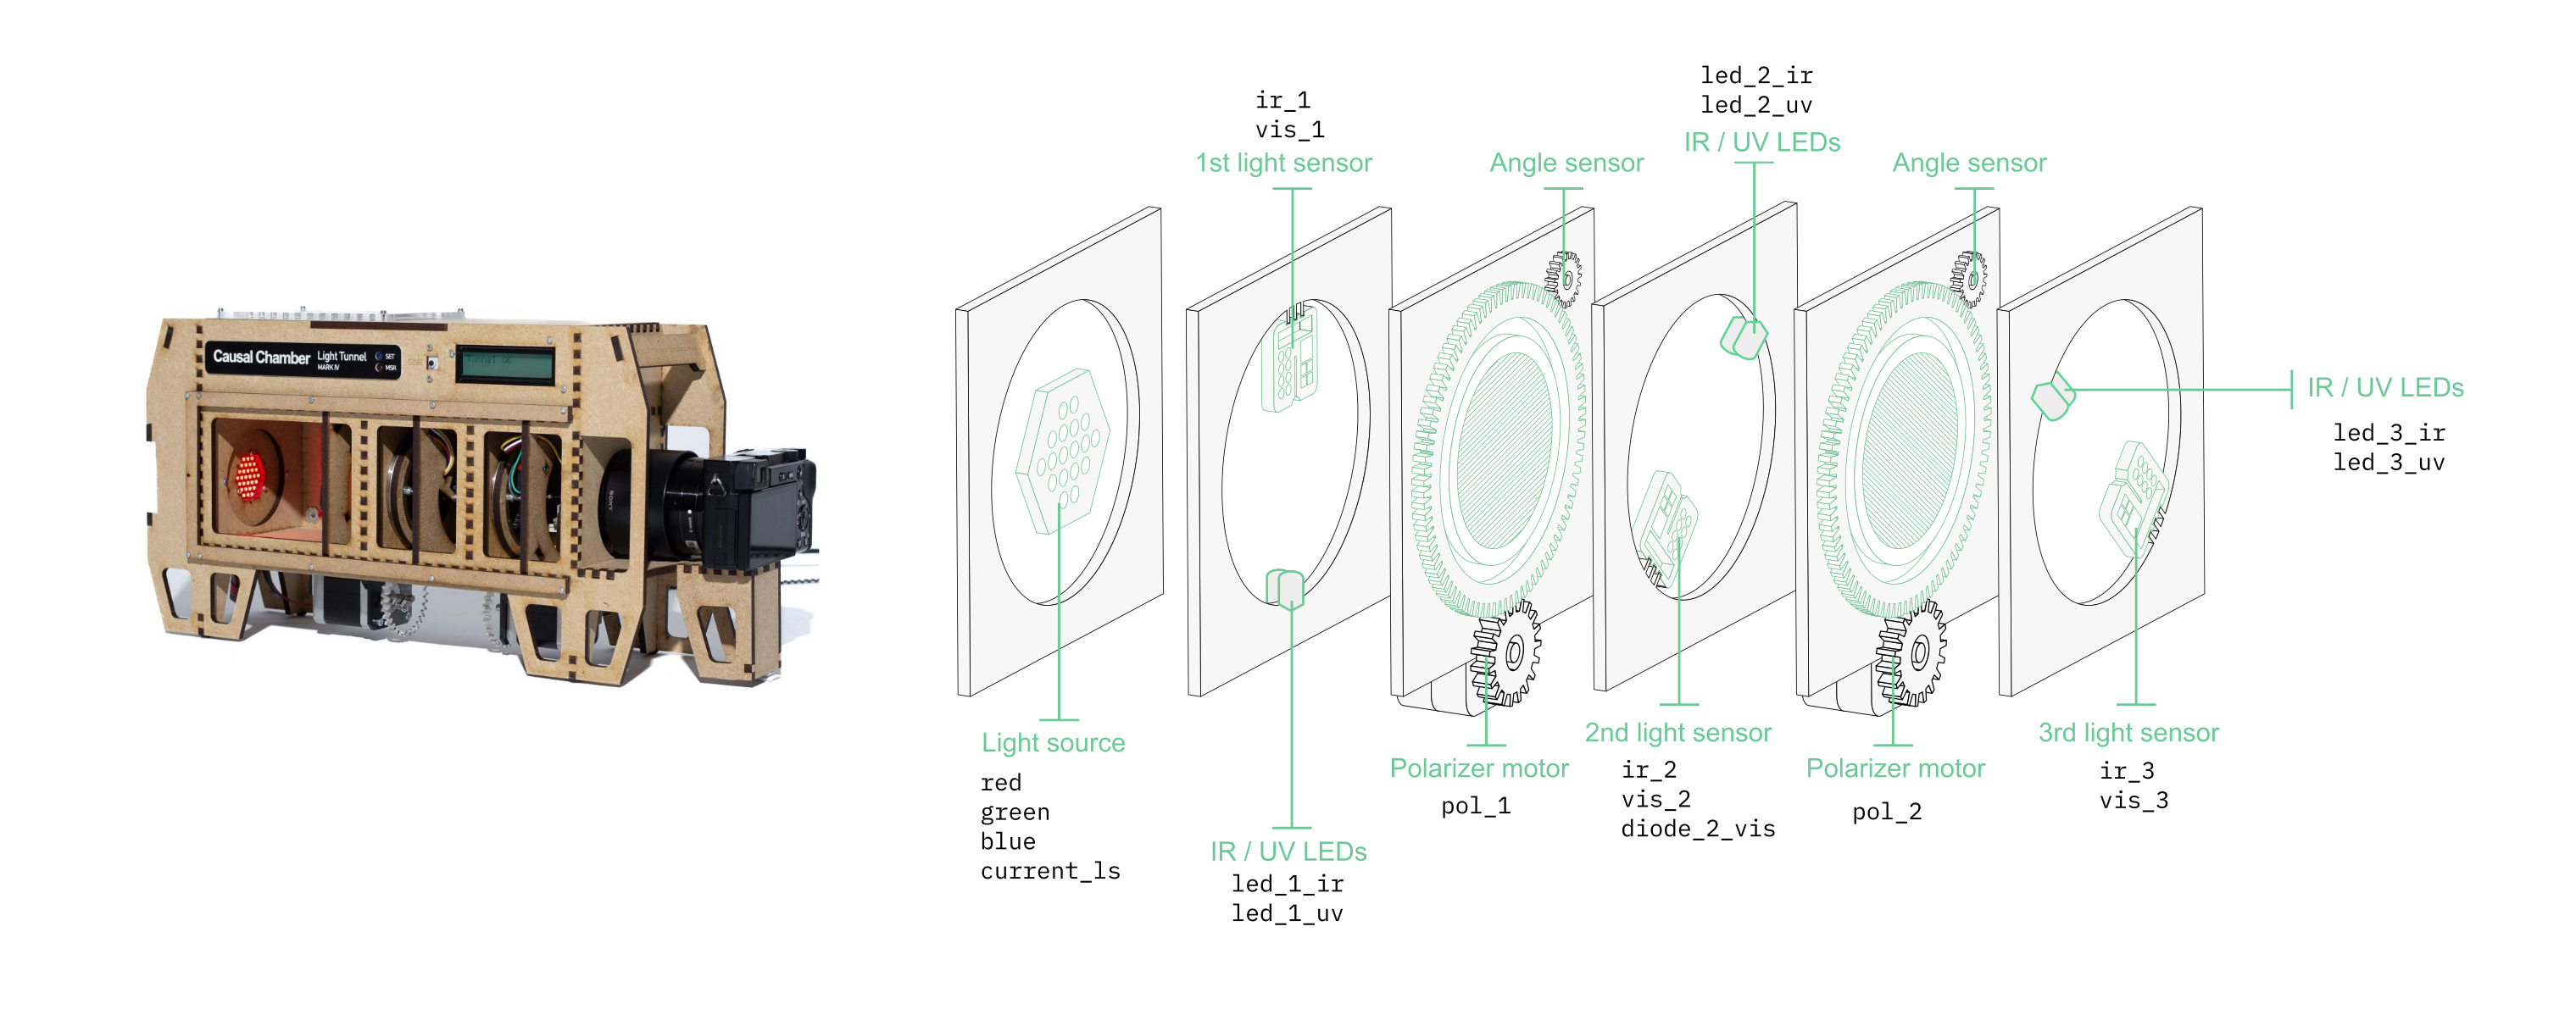

## Using the models to predict the effect of our actions on the system

Now we will compare the three models in their ability to predict the effect of our actions on the system.

We will collect data from four different actions. For each one, we will manipulate some parameter of the system but keep everything else constant, i.e., as in the first experiment that produced the training data.

1. we will shift the variable `red`, increasing the brighntess of the red light coming from the light source
2. we will shift the readings of `ir_1` by turning on the IR LED (`led_1_ir`) placed above the sensor
3. we will shift the readings of `vis_2` by using a smaller photodiode for that sensor (`diode_2_vis`)
4. we will turn the second polarizer (`pol_2`) by 90 degrees, affecting the measurement `ir_3`

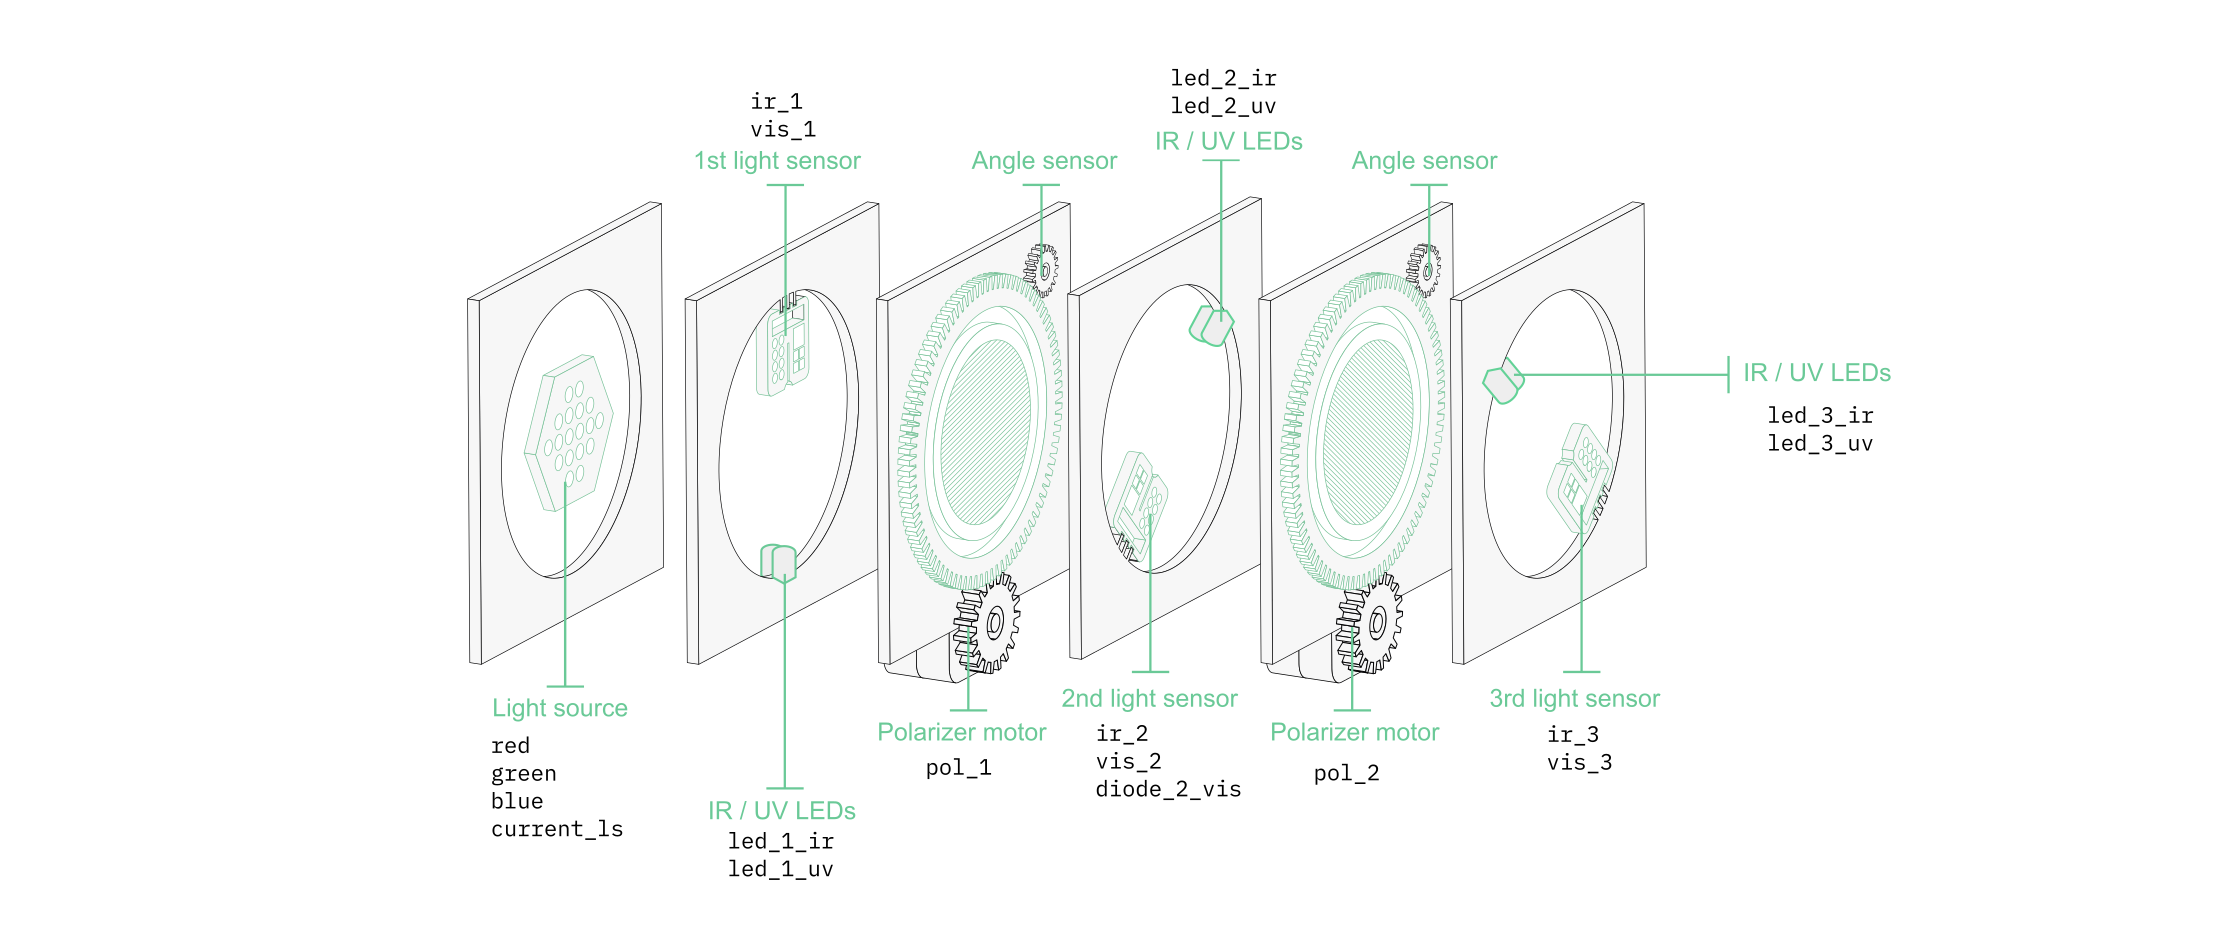

As you run the experiments below, store the collected dataframes in the following dictionary.

In [ ]:
datasets = {
    'reference': test_data, # Original experiment
    'red': 'TODO', # First experiment
    'led_1': 'TODO', # Second experiment
    'diode_2': 'TODO', # Third experiment
    'pol': 'TODO', # Third experiment
}

<mark style="background-color: #40E0D0;"> Task </mark>

For the first experiment, our action will be to increase the brightness of the red color on the light source.

In other words, collect data as in our original experiment, but sample `red` from the interval `[129,255]` instead of `[0,128]`.

In [ ]:
# TODO: Your code goes here

# Store in the dictionary
datasets['red'] = 'TODO'

<mark style="background-color: #40E0D0;"> Task </mark>

For the second experiment, we will shift the measurements of `ir_1` by turning on the IR LED above the 1st sensor.

In other words, collect data as in our original experiment, but before starting call `.set('led_1_ir', 500)`.

In [ ]:
# TODO: Your code goes here

# Store in the dictionary
datasets['led_1'] = 'TODO'

<mark style="background-color: #40E0D0;"> Task </mark>

For the third experiment, we will shift the measurements of `vis_2` by reducing the size of the diode used for that measurement.

Collect data as in our original experiment, but before starting call `.set('diode_vis_2', 0)`.

In [ ]:
# TODO: Your code goes here

# Store in the dictionary
datasets['diode_2'] = 'TODO'

<mark style="background-color: #40E0D0;"> Task </mark>

For the fourth and last experiment, we will shift the second polarizer by 90 degrees.

In other words, collect data as in our original experiment, but before starting call `.set('pol_2', 90)`.

In [ ]:
# TODO: Your code goes here

# Store in the dictionary
datasets['pol'] = 'TODO'

Now, let's plot all the data to visualize the effect of our actions.

Assuming you stored the dataframe from each experiment in the `datasets` dictionary, you can visualize the data by calling.

In [ ]:
combined = pd.concat([df.assign(dataset=name) for name, df in datasets.items()], ignore_index=True)
sns.pairplot(combined, vars=all_variables, hue='dataset')

Now, we will evaluate our three models (all predictors, only sensors and only colors) on the new interventional data we have collected.

<mark style="background-color: #40E0D0;"> Task </mark>

Compute the MSE of each model on each dataset, and store the results into a new dataframe `mses` with
- columns `model`, `dataset`, `mse`
- each row contains the mse for each pair of model and dataset

In [ ]:
columns = ['model', 'dataset', 'mse']

# TODO: your code goes here
mses = None

Now, you can use this function to compare the MSE of each model across experiments

In [ ]:
sns.barplot(mses, x="dataset", y="mse", hue="model")

Answer the following questions:

<mark style="background-color: #648fff;">Question:</mark> Which model attains the lowest MSE of all? On which experiment does this happen?

<mark style="background-color: #648fff;">Question:</mark> Which model attains the highest MSE of all? On which experiment does this happen?

<mark style="background-color: #648fff;">Question:</mark> Which model has the most stable performance across all experiments?